In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
df = pd.read_csv(".././Datasets/Perceptron/data.csv")


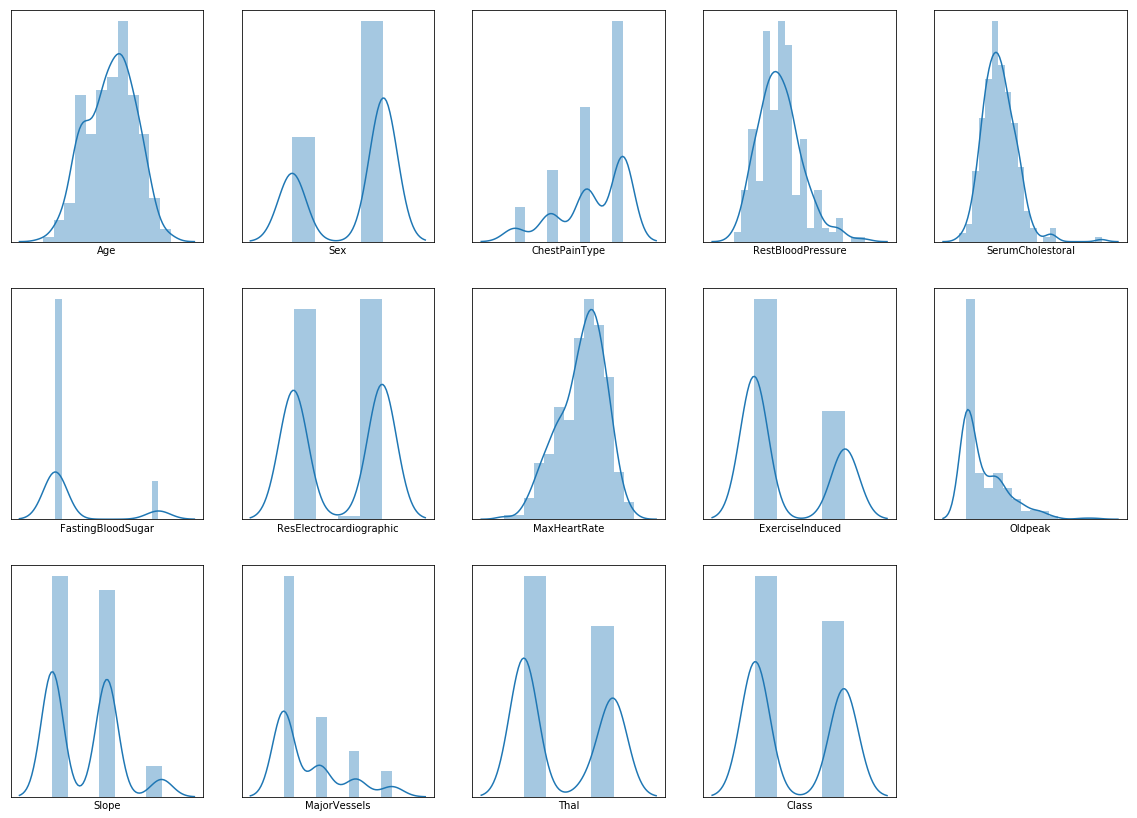

In [4]:
plt.figure(figsize=(20, 40))
for i in range(len(df.columns)):
    plt.subplot(8, 5, i+1)
    sns.distplot(df[df.columns[i]])
    plt.xticks([])
    plt.yticks([])

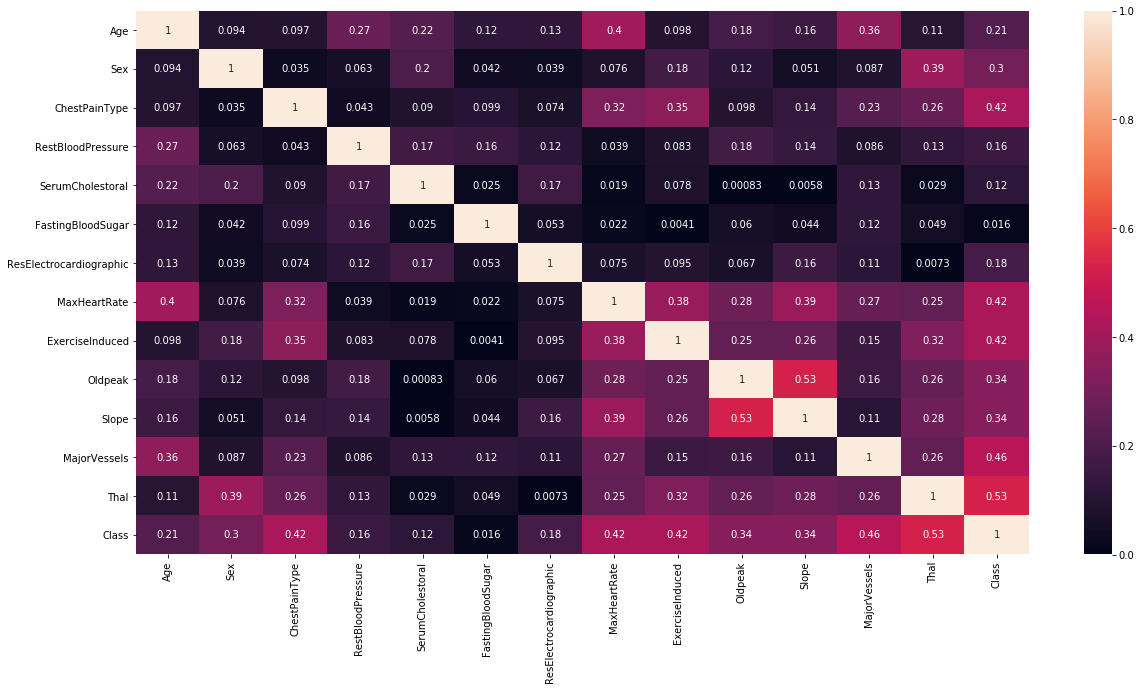

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
Age                        270 non-null int64
Sex                        270 non-null int64
ChestPainType              270 non-null int64
RestBloodPressure          270 non-null int64
SerumCholestoral           270 non-null int64
FastingBloodSugar          270 non-null int64
ResElectrocardiographic    270 non-null int64
MaxHeartRate               270 non-null int64
ExerciseInduced            270 non-null int64
Oldpeak                    270 non-null int64
Slope                      270 non-null int64
MajorVessels               270 non-null int64
Thal                       270 non-null int64
Class                      270 non-null int64
dtypes: int64(14)
memory usage: 29.6 KB


In [7]:
import pandas_profiling
df.profile_report()

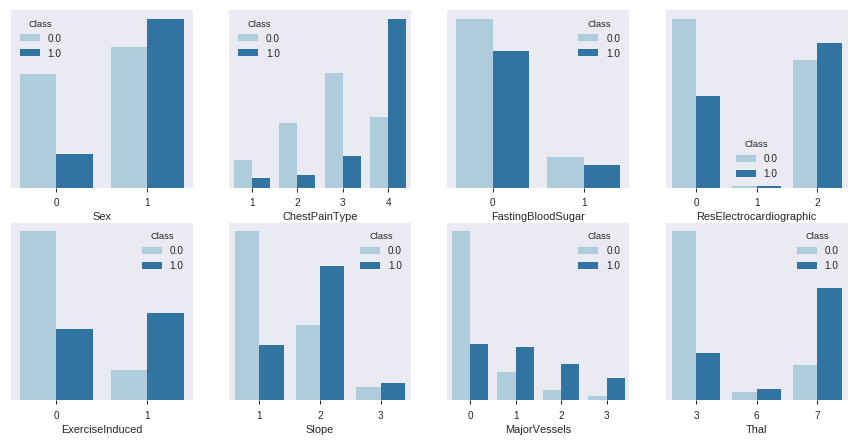

In [49]:
categoricalColumns = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'ResElectrocardiographic', 'ExerciseInduced', 'Slope', 'MajorVessels', 'Thal']
matplotlib.rcParams['figure.figsize']=(15,15)
for i in range(len(categoricalColumns)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df[categoricalColumns[i]], hue='Class', data=df, palette='Paired')
    plt.yticks([])
    plt.ylabel('')
plt.show()

In [51]:
for i in categoricalColumns:
    df[categoricalColumns] = df[categoricalColumns].astype('category')
df[categoricalColumns].describe()

,Sex,ChestPainType,FastingBloodSugar,ResElectrocardiographic,ExerciseInduced,Slope,MajorVessels,Thal
count,270,270,270,270,270,270,270,270
unique,2,4,2,3,2,3,4,3
top,1,4,0,2,0,1,0,3
freq,183,129,230,137,181,130,160,152


In [52]:
categoricalColumns = np.setdiff1d(categoricalColumns, ['MajorVessels', 'ChestPainType'])
categoricalColumns

array(['ExerciseInduced', 'FastingBloodSugar', 'ResElectrocardiographic',
       'Sex', 'Slope', 'Thal'], dtype='<U23')

In [54]:
numericalColumns = np.setdiff1d(df.columns[:-1], categoricalColumns)
numericalColumns

array(['Age', 'ChestPainType', 'MajorVessels', 'MaxHeartRate', 'Oldpeak',
       'RestBloodPressure', 'SerumCholestoral'], dtype=object)

In [56]:
X_cols = np.append(numericalColumns, categoricalColumns)
y_cols = np.array(['Class'])
X_cols, y_cols

(array(['Age', 'ChestPainType', 'MajorVessels', 'MaxHeartRate', 'Oldpeak',
        'RestBloodPressure', 'SerumCholestoral', 'ExerciseInduced',
        'FastingBloodSugar', 'ResElectrocardiographic', 'Sex', 'Slope',
        'Thal'], dtype=object), array(['Class'], dtype='<U5'))

In [58]:
X = df[X_cols]
y = df[y_cols]-1
X.head()

,Age,ChestPainType,MajorVessels,MaxHeartRate,Oldpeak,RestBloodPressure,SerumCholestoral,ExerciseInduced,FastingBloodSugar,ResElectrocardiographic,Sex,Slope,Thal
0,0.854167,4,3,0.290076,0.387097,0.339623,0.447489,0,0,2,1,2,3
1,0.791667,3,0,0.679389,0.258065,0.198113,1.000000,0,0,2,0,2,7
2,0.583333,2,0,0.534351,0.048387,0.283019,0.308219,0,0,0,1,1,7
3,0.729167,4,1,0.259542,0.032258,0.320755,0.312785,1,0,0,1,2,7
4,0.937500,2,1,0.381679,0.032258,0.245283,0.326484,1,0,2,0,1,3


In [59]:
y.head()

,Class
0,0.0
1,-1.0
2,0.0
3,-1.0
4,-1.0


In [60]:
weights = np.random.normal(0, 1, df.shape[1])
# weights = np.ones(len(numericalColumns)+1)
bias=1
weights

array([-0.6686272 ,  0.48736602,  1.78054005,  1.06862435, -0.36371141,
       -1.68853676, -0.8602163 ,  0.94381966, -1.80913776,  0.58740762,
       -0.28637593, -0.05348123,  1.2272933 , -1.47056576])

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numColumns] = scaler.fit_transform(df[numColumns].values)
df.head()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,0.854167,1,4,0.339623,0.447489,0,2,0.290076,0,0.387097,2,3,3,1.0
1,0.791667,0,3,0.198113,1.000000,0,2,0.679389,0,0.258065,2,0,7,0.0
2,0.583333,1,2,0.283019,0.308219,0,0,0.534351,0,0.048387,1,0,7,1.0
3,0.729167,1,4,0.320755,0.312785,0,0,0.259542,1,0.032258,2,1,7,0.0
4,0.937500,0,2,0.245283,0.326484,0,2,0.381679,1,0.032258,1,1,3,0.0


In [62]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def add(arr1, arr2):
    arr3 = []
    for i in range(len(arr1)):
        arr3.append(arr1[i]+arr2[i])
    return arr3

iterations = 100
learningRate=0.01
weightsHistory = []
predHistory = []
costHistory = []
deltaWHistory=[]
for i in range(iterations):
    if i%5==0:
        print("Progress: {}%".format((i/iterations)*100))
    cost = 0
    for i in range(len(df)):
        # Make prediction
        X = df[xcol].values[i]
        X = np.insert(X, 0, 1)
        y = df['Class'][i]-1

        pred = np.dot(weights, X)
        err = (y-pred)
        deltaW = np.multiply(err, X)
        deltaWHistory.append(deltaW)
        weights = np.add(weights, learningRate*deltaW)
        weightsHistory.append(weights)
        predHistory.append(pred)
        cost += (pred-y)
    cost = 2/df.shape[0]*cost
    costHistory.append(cost)
print("Completed")

Progress: 0.0%
Progress: 5.0%
Progress: 10.0%
Progress: 15.0%
Progress: 20.0%
Progress: 25.0%
Progress: 30.0%
Progress: 35.0%
Progress: 40.0%
Progress: 45.0%
Progress: 50.0%
Progress: 55.00000000000001%
Progress: 60.0%
Progress: 65.0%
Progress: 70.0%
Progress: 75.0%
Progress: 80.0%
Progress: 85.0%
Progress: 90.0%
Progress: 95.0%
Completed


In [63]:
weights


array([-1.4021777535701365, -0.057365874001717755, 0.06879143953668027,
       0.11409157030712246, -0.12766339596556878, 0.1001948434292904,
       -0.37839109770793816, 0.44464206818639584, 0.06740260466509933,
       0.20397597110707827, 0.1903258082487044, 0.10706786801477963,
       0.05489416070851223, 0.036321774910224126], dtype=object)

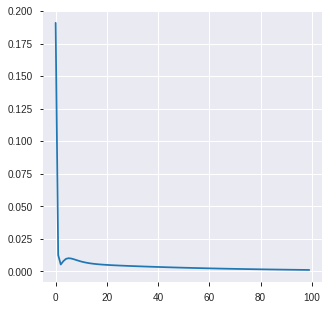

In [64]:
matplotlib.rcParams['figure.figsize']=(5, 5)
plt.plot(costHistory)
plt.show()

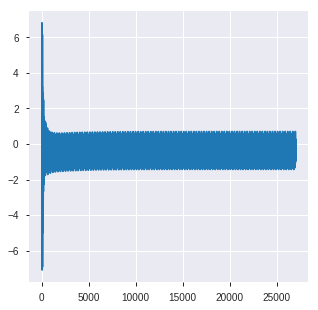

In [65]:
plt.plot(predHistory)

In [66]:
weightsHistory = np.array(weightsHistory)
weightsHistory

array([[-0.6322523516907025, 0.5184361980030261, 1.92603944322641, ...,
        -0.017106379607888723, 1.3000429931875608, -1.3614412195719536],
       [-0.5889742004027163, 0.5526980677726818, 2.0558738970903687, ...,
        -0.017106379607888723, 1.3865992957635331, -1.05849416055605],
       [-0.5641347702455493, 0.5671877353643626, 2.105552757404703, ...,
        0.00773305054927834, 1.4114387259207002, -0.8846181494558806],
       ...,
       [-1.4010790026659006, -0.05711238130116319, 0.07318644315362367,
        ..., 0.1081666189190155, 0.057091662516983936,
        0.04849349304323461],
       [-1.404037491139335, -0.058838166243999866, 0.06135248925988644,
        ..., 0.10520813044558118, 0.05117468557011532,
        0.030742562202628755],
       [-1.4021777535701365, -0.057365874001717755, 0.06879143953668027,
        ..., 0.10706786801477963, 0.05489416070851223,
        0.036321774910224126]], dtype=object)

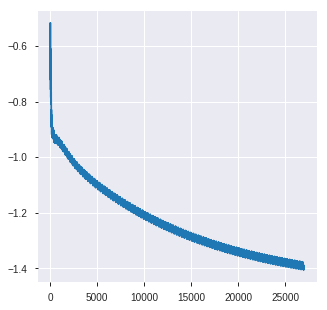

In [67]:
plt.plot(weightsHistory[:, 0])

In [68]:
y_pred = []
y_actual = []
for i in range(270):
    pred = np.dot(np.insert(df[xcol].values[i], 0, 1), weights)
    y_pred.append(1 if pred>0.5 else 0)
    y_actual.append(df['Class'][i]-1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_pred)
cm

array([[  0, 150],
       [  0, 120]])